HW 4

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Part 1

In [63]:
xMin = 1.2345
xMax = 2.3445
nn = 17
stepsize = (xMax - xMin) / (nn - 1)

v = np.zeros(17)

for i in range(17):
    v[i] = i * stepsize + xMin

v

array([1.2345  , 1.303875, 1.37325 , 1.442625, 1.512   , 1.581375,
       1.65075 , 1.720125, 1.7895  , 1.858875, 1.92825 , 1.997625,
       2.067   , 2.136375, 2.20575 , 2.275125, 2.3445  ])

Part 2

In [64]:
H = np.loadtxt('/Users/simoncha/Desktop/school/EPS 109/labs/lab4/topography_180x360_grid.txt')

SA = 0
R = 6.378e6
theta = 2*math.pi/360
phi = math.pi/180
midpoint_adj = np.linspace(theta/2, np.pi-theta/2, 180)

for i in midpoint_adj:
    for j in range(360):
        SA += R**2 * np.sin(i) * phi * theta

water = 0
theta = 2*math.pi/360
phi = math.pi/180
midpoint_adj = np.linspace(theta/2, np.pi-theta/2, 180)
longitude_tracker = 0

for i in midpoint_adj:
    for j in range(360):
        if (H[longitude_tracker][j] < 0):
            water += R**2 * np.sin(i) * phi * theta
    longitude_tracker += 1

print(f"Proportion of Water: {np.round(water/SA*100,2)}%")

volume_water = 0
theta = 2*math.pi/360
phi = math.pi/180
midpoint_adj = np.linspace(theta/2, np.pi-theta/2, 180)
longitude_tracker = 0

for i in midpoint_adj:
    for j in range(360):
        if (H[longitude_tracker][j] < 0):
            volume_water += (R**2 * np.sin(i) * phi * theta) * (H[longitude_tracker][j] * -1)
    longitude_tracker += 1

print(f"Volume of Water: {volume_water}")

Proportion of Water: 70.94%
Volume of Water: 1.339667300494778e+18


2.1

In [65]:
new_volume_water = 0
theta = 2*math.pi/360
phi = math.pi/180
midpoint_adj = np.linspace(theta/2, np.pi-theta/2, 180)
longitude_tracker = 0

for i in midpoint_adj:
    for j in range(360):
        if (H[longitude_tracker][j] < 0):
            new_volume_water += (R**2 * np.sin(i) * phi * theta) * ((425 + H[longitude_tracker][j]) * -1)
    longitude_tracker += 1

print(f"New Volume of Water: {new_volume_water}")
print(f"Proportion decrease: {np.round((1 - (new_volume_water / volume_water))*100, 2)}%")

New Volume of Water: 1.185539504369617e+18
Proportion decrease: 11.5%


2.2

In [66]:
water = 0
theta = 2*math.pi/360
phi = math.pi/180
midpoint_adj = np.linspace(theta/2, np.pi-theta/2, 180)
longitude_tracker = 0

for i in midpoint_adj:
    for j in range(360):
        if (H[longitude_tracker][j] < 625):
            water += R**2 * np.sin(i) * phi * theta
    longitude_tracker += 1

print(f"Proportion of Water: {np.round(water/SA*100,2)}%")

Proportion of Water: 88.86%


2.3

In [67]:
target = 5.5

perc_increase = np.array(perc_increase)
depths = -depth_offsets

exact_depth = np.interp(target, perc_increase, depths)
print(f"Depth needed for {target}% increase: {exact_depth:.2f} m")

Depth needed for 5.5% increase: 203.17 m


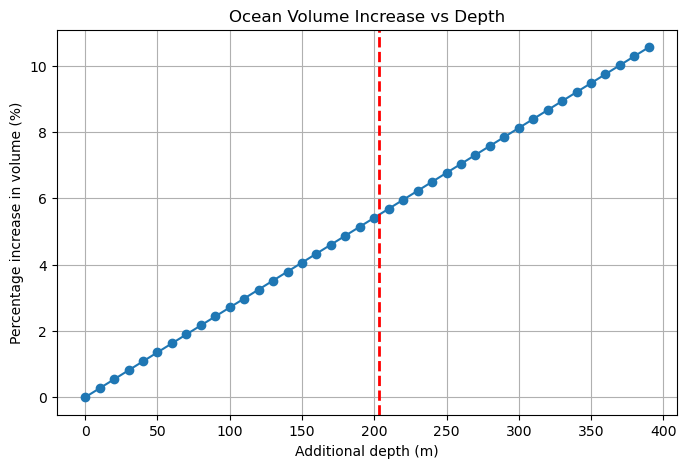

In [68]:
depth_offsets = np.arange(0, -400, -10)
perc_increase = []

for offset in depth_offsets:
    new_volume_water = 0
    longitude_tracker = 0
    for i in midpoint_adj:
        for j in range(360):
            if H[longitude_tracker][j] < 0:
                patch_area = R**2 * np.sin(i) * phi * theta
                depth = -(H[longitude_tracker][j] + offset)
                new_volume_water += patch_area * depth
        longitude_tracker += 1
    increase = (new_volume_water - volume_water) / volume_water * 100
    perc_increase.append(increase)

plt.figure(figsize=(8,5))
plt.plot(-depth_offsets, perc_increase, marker='o')
plt.xlabel("Additional depth (m)")
plt.ylabel("Percentage increase in volume (%)")
plt.title("Ocean Volume Increase vs Depth")
plt.axvline(x=203.17, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()